# human alpha 

In [1]:
import numpy as np
import pandas as pd
from tcrdist.repertoire import TCRrep
from tcrdist.repertoire import TCRrep
import numpy as np
data_alpha = pd.read_csv("human_alpha.csv")
tr_alpha = TCRrep(cell_df=data_alpha, 
                 organism='human', 
                 chains=['alpha'], 
                 db_file='alphabeta_gammadelta_db.tsv')
alpha_distance_matrix = tr_alpha.pw_alpha
alpha_distance_matrix

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:833: FutureWarning: The provided callable <function sum at 0x106232660> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[  0, 155, 152, ..., 133, 140, 169],
       [155,   0, 154, ..., 134, 157, 164],
       [152, 154,   0, ..., 151, 149, 166],
       ...,
       [133, 134, 151, ...,   0, 149, 173],
       [140, 157, 149, ..., 149,   0, 155],
       [169, 164, 166, ..., 173, 155,   0]], dtype=int16)

In [2]:
alpha_distance_matrix.shape

(919, 919)

In [3]:
def min_max_normalize(dist_matrix):
    min_val = np.min(dist_matrix)
    max_val = np.max(dist_matrix)
    norm_matrix = (dist_matrix - min_val) / (max_val - min_val)
    return norm_matrix

normalized_alpha_distances_matrix = min_max_normalize(alpha_distance_matrix)

print(normalized_alpha_distances_matrix)
np.save('alpha_distance_human_matrix.npy', normalized_alpha_distances_matrix)

[[0.         0.58270677 0.57142857 ... 0.5        0.52631579 0.63533835]
 [0.58270677 0.         0.57894737 ... 0.5037594  0.59022556 0.61654135]
 [0.57142857 0.57894737 0.         ... 0.56766917 0.56015038 0.62406015]
 ...
 [0.5        0.5037594  0.56766917 ... 0.         0.56015038 0.65037594]
 [0.52631579 0.59022556 0.56015038 ... 0.56015038 0.         0.58270677]
 [0.63533835 0.61654135 0.62406015 ... 0.65037594 0.58270677 0.        ]]


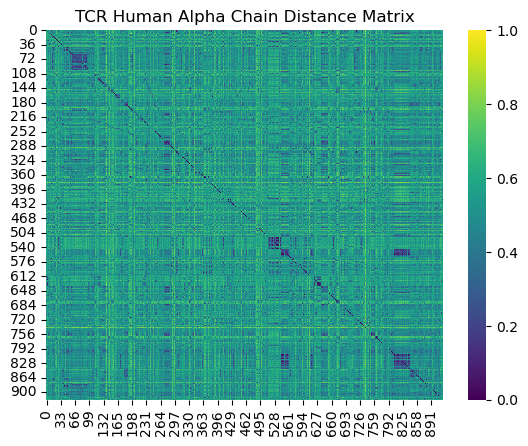

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
matrix = normalized_alpha_distances_matrix

sns.heatmap(matrix, cmap='viridis')
plt.title("TCR Human Alpha Chain Distance Matrix")
plt.show()

# human beta

In [5]:
from tcrdist.repertoire import TCRrep
import numpy as np
data_beta = pd.read_csv("human_beta.csv")
tr_beta = TCRrep(cell_df=data_beta, 
                 organism='human', 
                 chains=['beta'], 
                 db_file='alphabeta_gammadelta_db.tsv')
beta_distance_matrix = tr_beta.pw_beta
beta_distance_matrix

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:833: FutureWarning: The provided callable <function sum at 0x106232660> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[  0,  54,  39, ..., 195, 216, 199],
       [ 54,   0,  15, ..., 198, 204, 181],
       [ 39,  15,   0, ..., 198, 204, 181],
       ...,
       [195, 198, 198, ...,   0, 203, 198],
       [216, 204, 204, ..., 203,   0, 185],
       [199, 181, 181, ..., 198, 185,   0]], dtype=int16)

In [6]:
beta_distance_matrix.shape

(2516, 2516)

In [7]:
normalized_beta_distances_matrix= min_max_normalize(beta_distance_matrix)
print(normalized_beta_distances_matrix)
np.save('beta_distance_human_matrix.npy', normalized_beta_distances_matrix)

[[0.         0.20849421 0.15057915 ... 0.75289575 0.83397683 0.76833977]
 [0.20849421 0.         0.05791506 ... 0.76447876 0.78764479 0.6988417 ]
 [0.15057915 0.05791506 0.         ... 0.76447876 0.78764479 0.6988417 ]
 ...
 [0.75289575 0.76447876 0.76447876 ... 0.         0.78378378 0.76447876]
 [0.83397683 0.78764479 0.78764479 ... 0.78378378 0.         0.71428571]
 [0.76833977 0.6988417  0.6988417  ... 0.76447876 0.71428571 0.        ]]


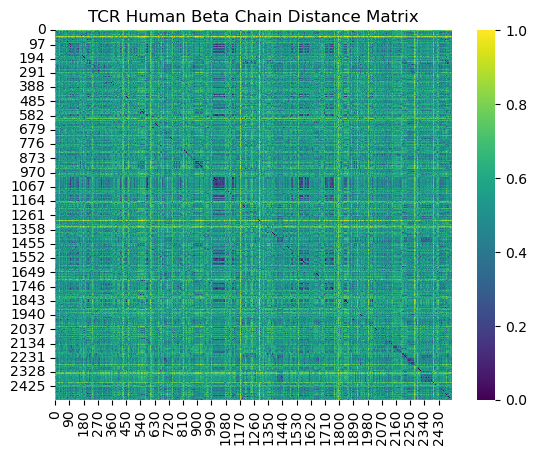

In [8]:
import seaborn as sns

matrix = normalized_beta_distances_matrix

sns.heatmap(matrix, cmap='viridis')
plt.title("TCR Human Beta Chain Distance Matrix")
plt.show()

# human combined

In [9]:
from tcrdist.repertoire import TCRrep
import numpy as np
data_combined= pd.read_csv("human_combined.csv")
tr = TCRrep(cell_df=data_combined, 
                  organism='human', 
                   chains = ['alpha', 'beta'],
                  db_file='alphabeta_gammadelta_db.tsv')

# Separate distance matrices for alpha and beta chains
tr.pw_alpha
tr.pw_beta

# Combine the distance _matrix of alpha and beta chains
combined_distances_matrix = tr.pw_alpha + tr.pw_beta
combined_distances_matrix

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:833: FutureWarning: The provided callable <function sum at 0x106232660> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[  0, 203, 203, ..., 314, 317, 329],
       [203,   0,   9, ..., 280, 297, 335],
       [203,   9,   0, ..., 271, 300, 335],
       ...,
       [314, 280, 271, ...,   0, 311, 317],
       [317, 297, 300, ..., 311,   0, 371],
       [329, 335, 335, ..., 317, 371,   0]], dtype=int16)

In [10]:
combined_distances_matrix.shape

(806, 806)

In [11]:
normalized_combined_distances_matrix=min_max_normalize(combined_distances_matrix)
print(normalized_combined_distances_matrix )
np.save('combined_distances_human_matrix.npy', normalized_combined_distances_matrix)

[[0.         0.44812362 0.44812362 ... 0.69315673 0.69977925 0.72626932]
 [0.44812362 0.         0.01986755 ... 0.61810155 0.65562914 0.73951435]
 [0.44812362 0.01986755 0.         ... 0.598234   0.66225166 0.73951435]
 ...
 [0.69315673 0.61810155 0.598234   ... 0.         0.68653422 0.69977925]
 [0.69977925 0.65562914 0.66225166 ... 0.68653422 0.         0.81898455]
 [0.72626932 0.73951435 0.73951435 ... 0.69977925 0.81898455 0.        ]]


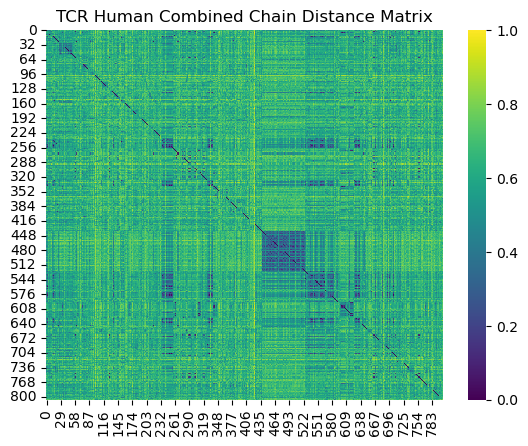

In [12]:
import seaborn as sns

matrix = normalized_combined_distances_matrix

sns.heatmap(matrix, cmap='viridis')
plt.title("TCR Human Combined Chain Distance Matrix")
plt.show()

# mouse alpha

In [13]:
import numpy as np
#alpha chain
data_alpha= pd.read_csv("mouse_alpha.csv")
tr_alpha = TCRrep(cell_df=data_alpha, 
                  organism='mouse', 
                  chains=['alpha'], 
                  db_file='alphabeta_gammadelta_db.tsv')


alpha_distance_matrix = tr_alpha.pw_alpha
alpha_distance_matrix

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:833: FutureWarning: The provided callable <function sum at 0x106232660> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[  0, 107, 119, ...,  88, 114, 106],
       [107,   0,  12, ..., 137, 100, 125],
       [119,  12,   0, ..., 137, 100, 113],
       ...,
       [ 88, 137, 137, ...,   0, 117,  60],
       [114, 100, 100, ..., 117,   0, 126],
       [106, 125, 113, ...,  60, 126,   0]], dtype=int16)

In [14]:
alpha_distance_matrix.shape

(584, 584)

In [15]:
normalized_alpha_distances_matrix = min_max_normalize(alpha_distance_matrix)

print(normalized_alpha_distances_matrix)
np.save('alpha_distance_mouse_matrix.npy', normalized_alpha_distances_matrix)

[[0.         0.48636364 0.54090909 ... 0.4        0.51818182 0.48181818]
 [0.48636364 0.         0.05454545 ... 0.62272727 0.45454545 0.56818182]
 [0.54090909 0.05454545 0.         ... 0.62272727 0.45454545 0.51363636]
 ...
 [0.4        0.62272727 0.62272727 ... 0.         0.53181818 0.27272727]
 [0.51818182 0.45454545 0.45454545 ... 0.53181818 0.         0.57272727]
 [0.48181818 0.56818182 0.51363636 ... 0.27272727 0.57272727 0.        ]]


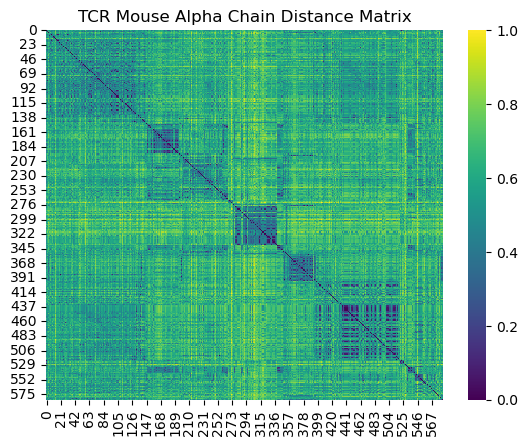

In [16]:
import seaborn as sns

matrix = normalized_alpha_distances_matrix

sns.heatmap(matrix, cmap='viridis')
plt.title("TCR Mouse Alpha Chain Distance Matrix")
plt.show()

# mouse beta

In [17]:
#beta chain
from tcrdist.repertoire import TCRrep
import numpy as np
data_beta = pd.read_csv("mouse_beta.csv")
tr_beta = TCRrep(cell_df=data_beta, 
                 organism='mouse', 
                 chains=['beta'], 
                 db_file='alphabeta_gammadelta_db.tsv')
beta_distance_matrix = tr_beta.pw_beta
beta_distance_matrix

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:833: FutureWarning: The provided callable <function sum at 0x106232660> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[  0,  89, 125, ..., 119, 119,  95],
       [ 89,   0,  72, ..., 115, 112,  91],
       [125,  72,   0, ..., 127,  91, 127],
       ...,
       [119, 115, 127, ...,   0,  72,  48],
       [119, 112,  91, ...,  72,   0,  48],
       [ 95,  91, 127, ...,  48,  48,   0]], dtype=int16)

In [18]:
beta_distance_matrix.shape

(644, 644)

In [19]:
normalized_beta_distances_matrix= min_max_normalize(beta_distance_matrix)
print(normalized_beta_distances_matrix)
np.save('beta_distance_mouse_matrix.npy', normalized_beta_distances_matrix)

[[0.         0.41981132 0.58962264 ... 0.56132075 0.56132075 0.44811321]
 [0.41981132 0.         0.33962264 ... 0.54245283 0.52830189 0.42924528]
 [0.58962264 0.33962264 0.         ... 0.5990566  0.42924528 0.5990566 ]
 ...
 [0.56132075 0.54245283 0.5990566  ... 0.         0.33962264 0.22641509]
 [0.56132075 0.52830189 0.42924528 ... 0.33962264 0.         0.22641509]
 [0.44811321 0.42924528 0.5990566  ... 0.22641509 0.22641509 0.        ]]


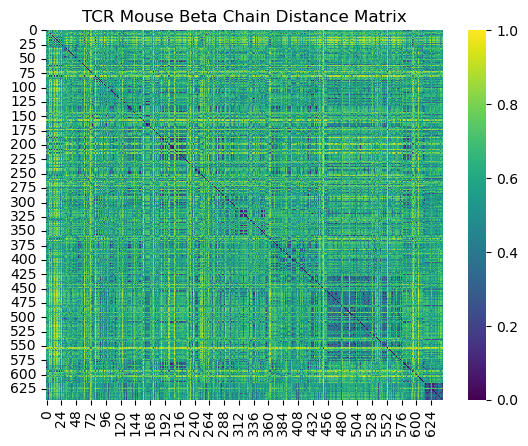

In [20]:
import seaborn as sns

matrix = normalized_beta_distances_matrix

sns.heatmap(matrix, cmap='viridis')
plt.title("TCR Mouse Beta Chain Distance Matrix")
plt.show()


# mouse combined

In [21]:
from tcrdist.repertoire import TCRrep
import numpy as np
data_combined= pd.read_csv("mouse_combined.csv")
tr = TCRrep(cell_df=data_combined, 
                  organism='mouse', 
                   chains = ['alpha', 'beta'],
                  db_file='alphabeta_gammadelta_db.tsv')

# Separate distance matrices for alpha and beta chains
tr.pw_alpha
tr.pw_beta

# Combine the distance _matrix of alpha and beta chains
combined_distances_matrix = tr.pw_alpha + tr.pw_beta
combined_distances_matrix

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/tcrdist/repertoire.py:833: FutureWarning: The provided callable <function sum at 0x106232660> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[  0, 196, 244, ..., 242, 308, 218],
       [196,   0,  84, ..., 245, 276, 214],
       [244,  84,   0, ..., 266, 312, 223],
       ...,
       [242, 245, 266, ...,   0, 163, 240],
       [308, 276, 312, ..., 163,   0, 252],
       [218, 214, 223, ..., 240, 252,   0]], dtype=int16)

In [22]:
combined_distances_matrix.shape

(731, 731)

In [23]:
normalized_combined_distances_matrix=min_max_normalize(combined_distances_matrix)
print(normalized_combined_distances_matrix )
np.save('combined_distances_mouse_matrix.npy', normalized_combined_distances_matrix)

[[0.         0.49494949 0.61616162 ... 0.61111111 0.77777778 0.55050505]
 [0.49494949 0.         0.21212121 ... 0.61868687 0.6969697  0.54040404]
 [0.61616162 0.21212121 0.         ... 0.67171717 0.78787879 0.56313131]
 ...
 [0.61111111 0.61868687 0.67171717 ... 0.         0.41161616 0.60606061]
 [0.77777778 0.6969697  0.78787879 ... 0.41161616 0.         0.63636364]
 [0.55050505 0.54040404 0.56313131 ... 0.60606061 0.63636364 0.        ]]


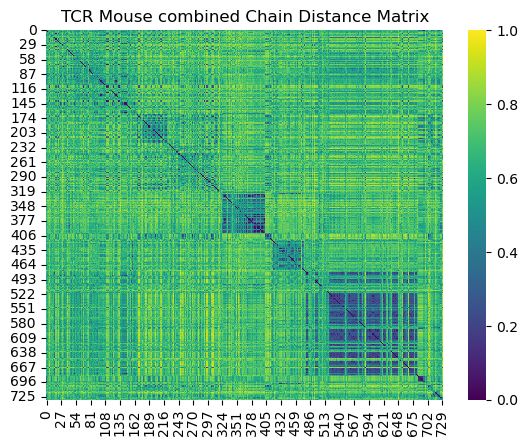

In [24]:
import seaborn as sns

matrix = normalized_combined_distances_matrix

sns.heatmap(matrix, cmap='viridis')
plt.title("TCR Mouse combined Chain Distance Matrix")
plt.show()